# Analysis of Hallsensor data for Booster Magnets

## Nominal Energy: 3 GeV (Current: 991.63 A)

Questions:

BO Dipoles

1. análise de $Z<0$ e $Z>0$ -> $x_0$ distintos?
2. malha de medida: pode ser com raias circulares? (ou reotimizar a malha)
3. efeitos dos campos de borda não medidos (estender malha?).
3. ordenamento (simples) dos dipolos
4. medidas em todas correntes
5. garantir que alinhamento usará $x_0$ em $z=0$. (tem que usar mesmo valor pra todas correntes)
6. analisar perfil longitudinal do quad e sext dos dipolos.
7. definir dipolos excluídos do Booster (baseado em medidas em baixa energia)


BO Quadrupoles

- definir quadrupolos excluídos.
- analisar QFs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

brho = 10.0  # [T.m]

spec_dip = 7.2    # [Deg]
spec_dip_error = 0.15  # [%]

spec_quad = 2.4788148246867  # [T]
spec_quad_error = 2.4  # [%]

spec_sext = 25.627729062301  # [T/m]
spec_sext_error = 9.0  # [%]

data = {
#   NAME        ANGLE  INT_DIPOLE[T.m]  INT_QUADRUPOLE[T] INT_SEXTUPOLE[T/m] INIT_RX@Z=0[mm]
    'bd-004': [-3.5982e+00, -6.2843e-01, +1.2099e+00, +1.3343e+01, 9.1010],
    'bd-005': [-3.6032e+00, -6.2931e-01, +1.2069e+00, +1.2601e+01, 9.1197],
    'bd-006': [-3.5975e+00, -6.2831e-01, +1.2121e+00, +1.2937e+01, 9.1083],
    'bd-007': [-3.5923e+00, -6.2742e-01, +1.2143e+00, +1.3588e+01, 9.1159],
    'bd-008': [-3.6038e+00, -6.2943e-01, +1.2139e+00, +1.3509e+01, 9.0697],
    'bd-009': [-3.6000e+00, -6.2874e-01, +1.2063e+00, +1.3384e+01, 9.1112],
    'bd-010': [-3.6043e+00, -6.2951e-01, +1.2096e+00, +1.3433e+01, 9.0939],
    'bd-011': [-3.6027e+00, -6.2922e-01, +1.2141e+00, +1.3094e+01, 9.0667],
    'bd-012': [-3.5938e+00, -6.2767e-01, +1.2096e+00, +1.1061e+01, 9.0750],
    'bd-013': [-3.5964e+00, -6.2813e-01, +1.2126e+00, +1.3376e+01, 9.0949],
    'bd-014': [-3.5903e+00, -6.2705e-01, +1.2132e+00, +1.3386e+01, 9.1301],
    'bd-015': [-3.5915e+00, -6.2727e-01, +1.2132e+00, +1.2887e+01, 9.1766],
    'bd-016': [-3.6035e+00, -6.2936e-01, +1.2172e+00, +1.3367e+01, 9.1184],
    'bd-017': [-3.5985e+00, -6.2849e-01, +1.2130e+00, +1.3488e+01, 9.1048],
    'bd-018': [-3.5973e+00, -6.2828e-01, +1.2142e+00, +1.3641e+01, 9.1450],
    'bd-019': [-3.6068e+00, -6.2993e-01, +1.2187e+00, +1.3427e+01, 9.0823],
    'bd-020': [-3.6050e+00, -6.2964e-01, +1.2174e+00, +1.3456e+01, 9.0926],
    'bd-021': [-3.5987e+00, -6.2851e-01, +1.2177e+00, +1.3330e+01, 9.1431],
    'bd-022': [-3.6016e+00, -6.2903e-01, +1.2084e+00, +1.3260e+01, 9.1430],
    'bd-023': [-3.6010e+00, -6.2893e-01, +1.2084e+00, +1.4018e+01, 9.0958],
    'bd-024': [-3.6060e+00, -6.2981e-01, +1.2134e+00, +1.3176e+01, 9.1031],
    'bd-025': [-3.5987e+00, -6.2852e-01, +1.2174e+00, +1.3287e+01, 9.1081],
    'bd-026': [-3.6050e+00, -6.2962e-01, +1.2160e+00, +1.3018e+01, 9.1264],
    'bd-027': [-3.6007e+00, -6.2887e-01, +1.2142e+00, +1.3995e+01, 9.1286],
    'bd-028': [-3.5996e+00, -6.2868e-01, +1.2155e+00, +1.3100e+01, 9.1112],
    'bd-029': [-3.5940e+00, -6.2771e-01, +1.2093e+00, +1.3593e+01, 9.1572],
    'bd-030': [-3.5995e+00, -6.2867e-01, +1.2158e+00, +1.3830e+01, 9.1613],
    'bd-031': [-3.6015e+00, -6.2901e-01, +1.2120e+00, +1.3608e+01, 9.1475],
    'bd-032': [-3.5962e+00, -6.2808e-01, +1.2152e+00, +1.2939e+01, 9.1360],
    'bd-033': [-3.6067e+00, -6.2993e-01, +1.2202e+00, +1.3112e+01, 9.1126],
    'bd-034': [-3.5983e+00, -6.2846e-01, +1.2160e+00, +1.3714e+01, 9.1798],
    'bd-035': [-3.5933e+00, -6.2758e-01, +1.2180e+00, +1.3194e+01, 9.1515],
    'bd-036': [-3.5963e+00, -6.2811e-01, +1.2085e+00, +1.3183e+01, 9.1405],
    'bd-037': [-3.6078e+00, -6.3012e-01, +1.2133e+00, +1.3657e+01, 9.0985],
    'bd-038': [-3.5986e+00, -6.2851e-01, +1.2116e+00, +1.2740e+01, 9.1262],
    'bd-039': [-3.5987e+00, -6.2852e-01, +1.2117e+00, +1.3950e+01, 9.1100],
    'bd-040': [-3.6059e+00, -6.2978e-01, +1.2136e+00, +1.3601e+01, 9.1206],
    'bd-041': [-3.6010e+00, -6.2893e-01, +1.2112e+00, +1.3300e+01, 9.1172],
    'bd-042': [-3.6010e+00, -6.2892e-01, +1.2113e+00, +1.3707e+01, 9.1132],
    'bd-043': [-3.6024e+00, -6.2918e-01, +1.2096e+00, +1.3422e+01, 9.1160],
    'bd-044': [-3.6043e+00, -6.2951e-01, +1.2097e+00, +1.3276e+01, 9.1055],
    'bd-045': [-3.6002e+00, -6.2880e-01, +1.2123e+00, +1.2955e+01, 9.1207],
    'bd-046': [-3.5987e+00, -6.2853e-01, +1.2070e+00, +1.2501e+01, 9.1389],
    'bd-047': [-3.6043e+00, -6.2951e-01, +1.2101e+00, +1.3089e+01, 9.0851],
    'bd-048': [-3.6006e+00, -6.2885e-01, +1.2089e+00, +1.3087e+01, 9.0992],
    'bd-049': [-3.6016e+00, -6.2904e-01, +1.2104e+00, +1.3747e+01, 9.1268],
    'bd-050': [-3.6048e+00, -6.2959e-01, +1.2095e+00, +1.3473e+01, 9.0999],
    'bd-051': [-3.6050e+00, -6.2963e-01, +1.2158e+00, +1.3677e+01, 9.0902],
    'bd-052': [-3.5988e+00, -6.2854e-01, +1.2140e+00, +1.3368e+01, 9.1382],
    'bd-053': [-3.5954e+00, -6.2795e-01, +1.2116e+00, +1.3168e+01, 9.0998],
    'bd-054': [-3.6031e+00, -6.2930e-01, +1.2136e+00, +1.3043e+01, 9.1905],
    'bd-055': [-3.6028e+00, -6.2924e-01, +1.2099e+00, +1.3779e+01, 9.1184],
    'bd-056': [-3.6082e+00, -6.3018e-01, +1.2057e+00, +1.3114e+01, 9.0841],
    'bd-057': [-3.6032e+00, -6.2931e-01, +1.2147e+00, +1.3353e+01, 9.1210],
}
serials = sorted(data)

for i in range(len(serials)):
    print('{:02d}: {}'.format(i+1, serials[i]))

01: bd-004
02: bd-005
03: bd-006
04: bd-007
05: bd-008
06: bd-009
07: bd-010
08: bd-011
09: bd-012
10: bd-013
11: bd-014
12: bd-015
13: bd-016
14: bd-017
15: bd-018
16: bd-019
17: bd-020
18: bd-021
19: bd-022
20: bd-023
21: bd-024
22: bd-025
23: bd-026
24: bd-027
25: bd-028
26: bd-029
27: bd-030
28: bd-031
29: bd-032
30: bd-033
31: bd-034
32: bd-035
33: bd-036
34: bd-037
35: bd-038
36: bd-039
37: bd-040
38: bd-041
39: bd-042
40: bd-043
41: bd-044
42: bd-045
43: bd-046
44: bd-047
45: bd-048
46: bd-049
47: bd-050
48: bd-051
49: bd-052
50: bd-053
51: bd-054
52: bd-055
53: bd-056
54: bd-057


# Deflection Angle

Specification deflection angle     : +7.20000 T
Magnets deflection angle average   : +7.20106 T. (+0.01 %)

Specification deflection angle stddev : 0.15 %
Magnets deflection angle stddev       : 0.12 %


<IPython.core.display.Javascript object>


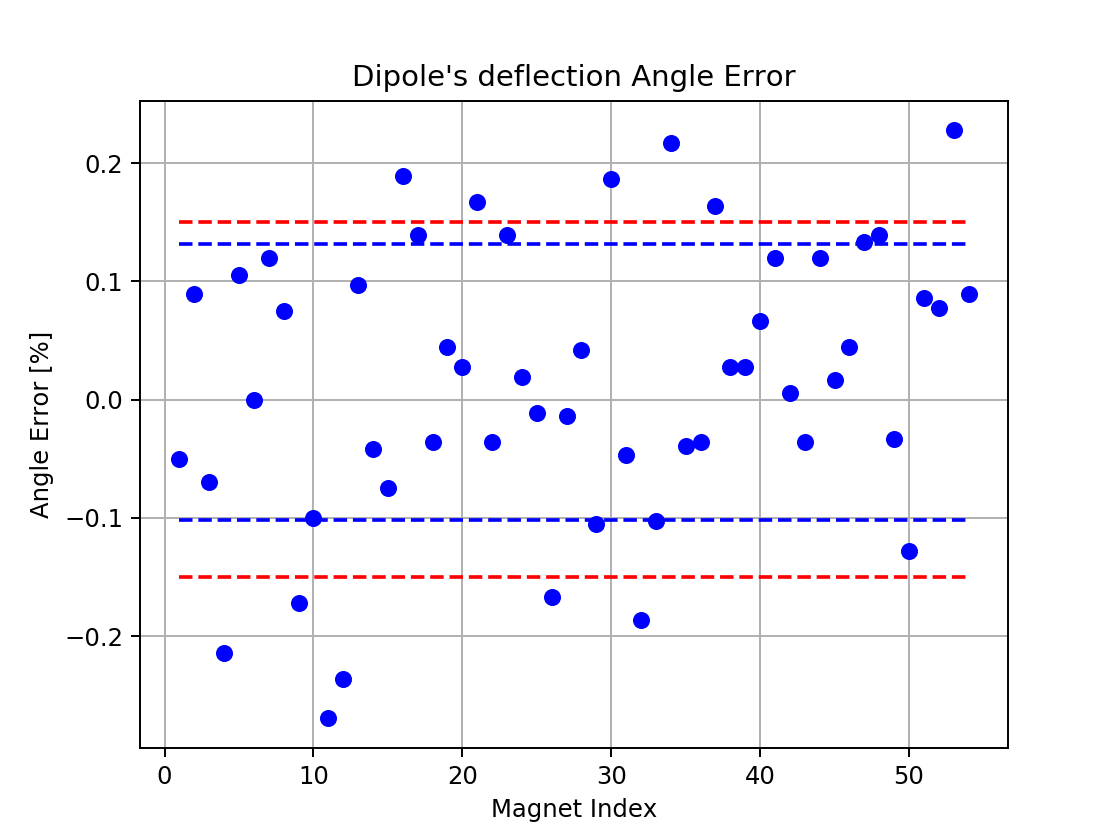

In [2]:
d = -2*np.array([data[mag][0] for mag in serials])
spec_d, spec_d_error = spec_dip, spec_dip_error

d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

print('Specification deflection angle     : {:+.5f} T'.format(spec_d))
print('Magnets deflection angle average   : {:+.5f} T. ({:+.2f} %)'.format(d_avg, d_avg_error))
print()
print('Specification deflection angle stddev : {:.2f} %'.format(spec_d_error))
print('Magnets deflection angle stddev       : {:.2f} %'.format(d_error_std))

plt.figure()
# Data
plt.plot(range(1,n+1), d_error, 'ob')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Angle Error [%]')
plt.title("Dipole's deflection Angle Error")
plt.show()

# Integrated Quadrupole

Specification quadrupole     : +2.47881 T
Magnets quadrupole average   : +2.42510 T. (-2.17 %)

Specification quadrupole stddev : 2.40 %
Magnets quadrupole stddev       : 0.27 %


<IPython.core.display.Javascript object>


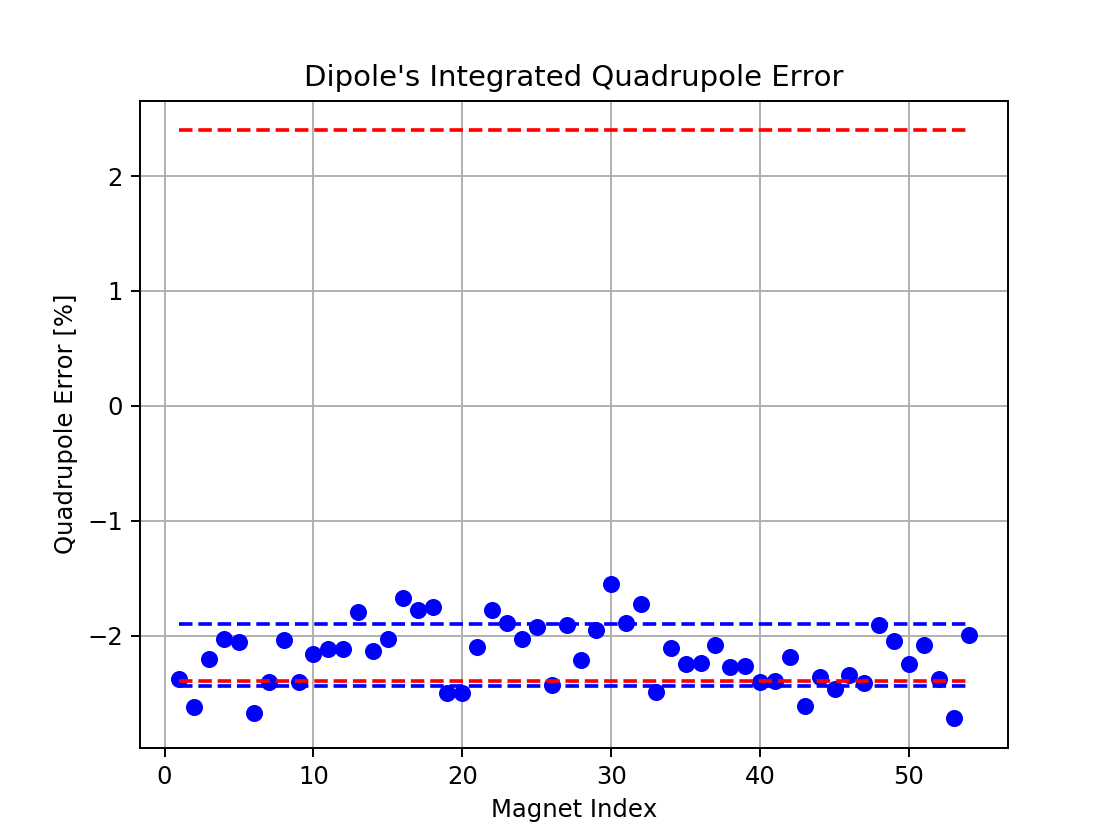

In [3]:
d = 2*np.array([data[mag][2] for mag in serials])
spec_d, spec_d_error = spec_quad, spec_quad_error

d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

print('Specification quadrupole     : {:+.5f} T'.format(spec_d))
print('Magnets quadrupole average   : {:+.5f} T. ({:+.2f} %)'.format(d_avg, d_avg_error))
print()
print('Specification quadrupole stddev : {:.2f} %'.format(spec_d_error))
print('Magnets quadrupole stddev       : {:.2f} %'.format(d_error_std))

plt.figure()
# Data
plt.plot(range(1,n+1), d_error, 'ob')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Quadrupole Error [%]')
plt.title("Dipole's Integrated Quadrupole Error")
plt.show()

# Integrated Sextupole

Specification sextupole     : +25.62773 T
Magnets sextupole average   : +26.60526 T. (+3.81 %)

Specification sextupole stddev : 9.00 %
Magnets sextupole stddev       : 3.50 %


<IPython.core.display.Javascript object>


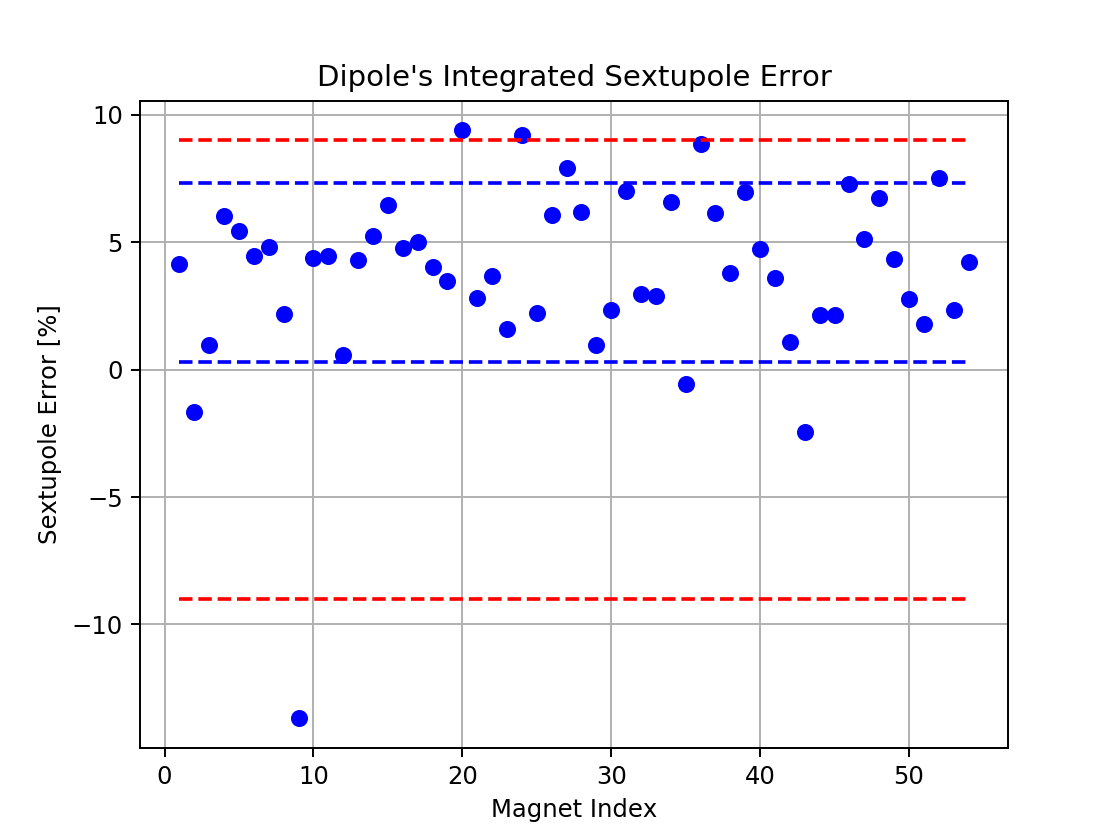

In [4]:
d = 2*np.array([data[mag][3] for mag in serials])
spec_d, spec_d_error = spec_sext, spec_sext_error

d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

print('Specification sextupole     : {:+.5f} T'.format(spec_d))
print('Magnets sextupole average   : {:+.5f} T. ({:+.2f} %)'.format(d_avg, d_avg_error))
print()
print('Specification sextupole stddev : {:.2f} %'.format(spec_d_error))
print('Magnets sextupole stddev       : {:.2f} %'.format(d_error_std))

# Data
plt.plot(range(1,n+1), d_error, 'ob')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Sextupole Error [%]')
plt.title("Dipole's Integrated Sextupole Error")
plt.show()

# Trajectory X position at Magnet Longitudinal Center

X position average: 9.1180 mm
X position stdddev: 26.5 um
X position maxdiff: 72.5 um


<IPython.core.display.Javascript object>


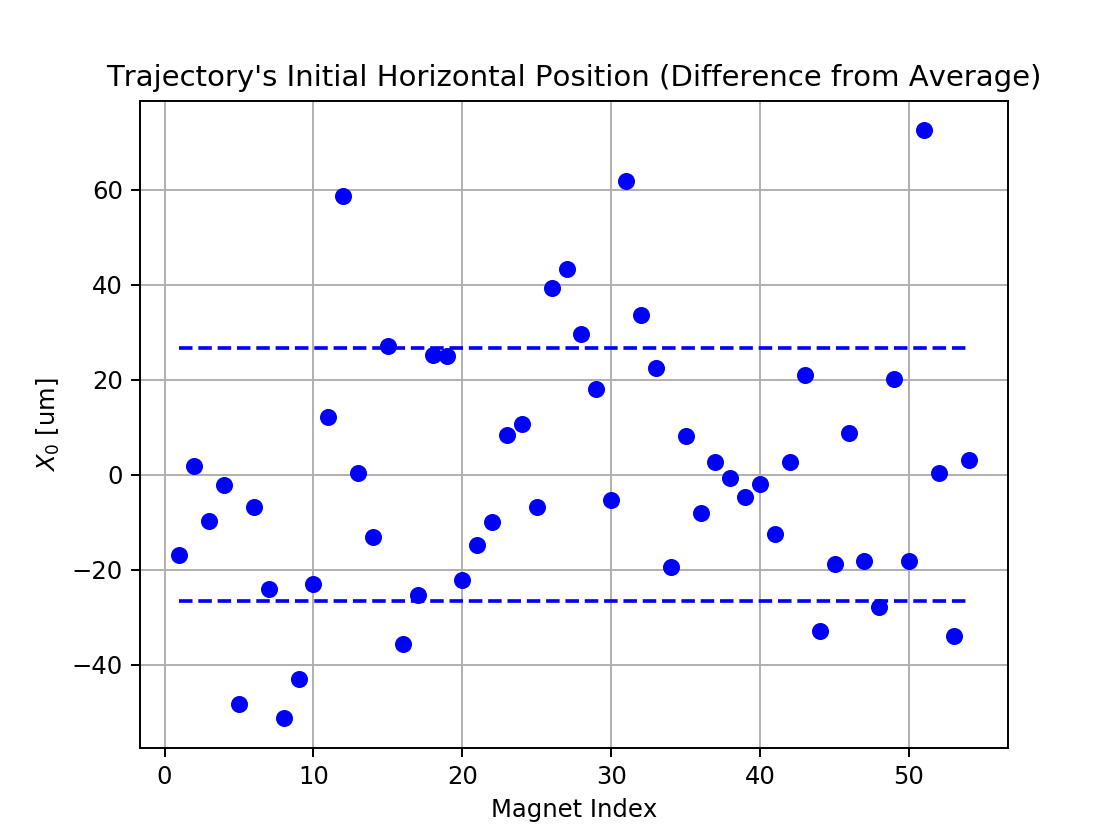

In [5]:
d = 1000*np.array([data[mag][4] for mag in serials])
d_avg = np.mean(d)
d_diff = d - d_avg
n = len(d_diff)

print('X position average: {:.4f} mm'.format(np.mean(d)/1000))
print('X position stdddev: {:.1f} um'.format(np.std(d)))
print('X position maxdiff: {:.1f} um'.format(max(abs(d_diff))))

# Data
plt.plot(range(1,n+1), d_diff, 'ob')
# Data RMS
plt.plot([1, n], [-np.std(d), ]*2, '--b')
plt.plot([1, n], [+np.std(d), ]*2, '--b')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('$X_0$ [um]')
plt.title("Trajectory's Initial Horizontal Position (Difference from Average)")
plt.show()

# Neglected Edge Field Contribution to Deflection Angle

1. Simulation: fieldmap calculaded in [-80, 35] mm (step 1 mm) from -1000 to 1000 mm
2. Measurements: data taken in [-50, 50] mm (step 2 mm) from ~ -786 mm to 786 mm

<IPython.core.display.Javascript object>


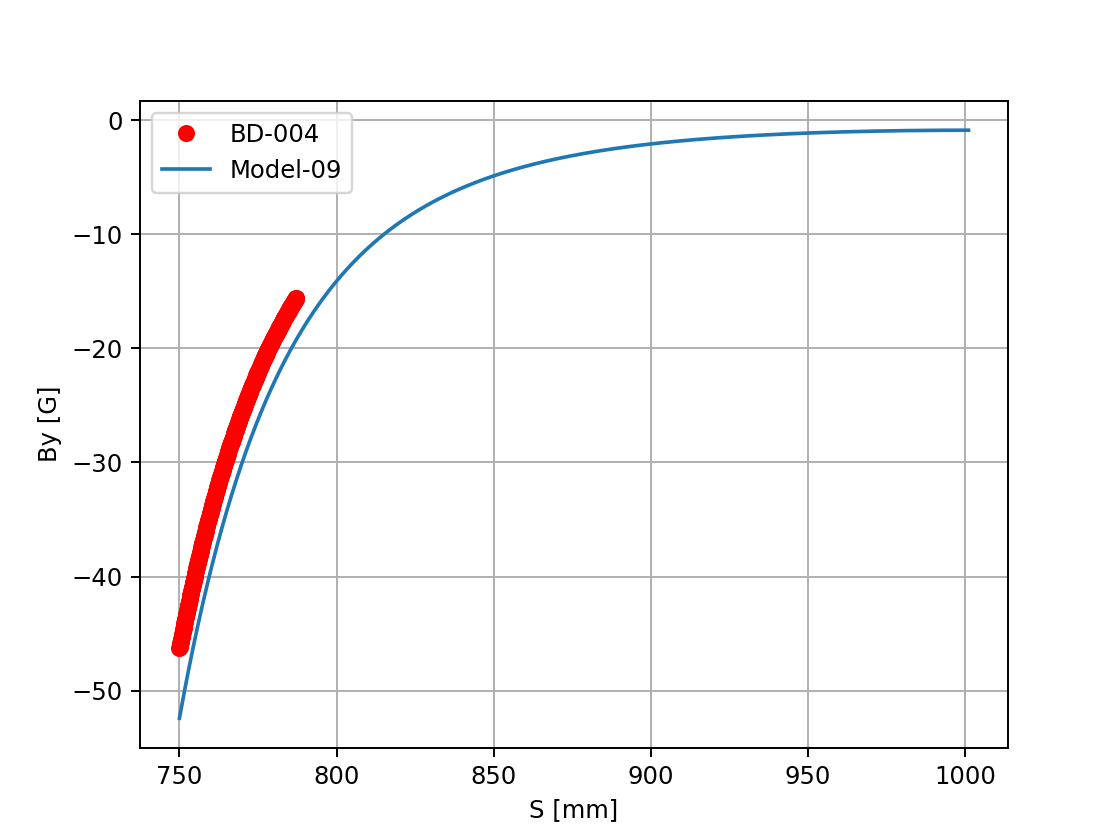

missing angle      : 0.018 deg.
missing angle error: 0.25 %


In [6]:

# read multipoles from model-09
lines = []
with open('/home/fac_files/lnls-ima/bo-dipoles/model-09/analysis/fieldmap/model-3gev/multipoles.txt') as f:
    lines = f.readlines()
data = []
for line in lines[2:]:
    d = [float(s) for s in line.split()]
    data.append(d)
mpoles = np.array(data)
s, intby = mpoles[:,0], mpoles[:,1]

# read multipoles from BD-004
lines = []
with open('/home/fac_files/lnls-ima/bo-dipoles/model-09/analysis/hallsensor/production/bd-004/M1/0991p63A/multipoles.txt') as f:
    lines = f.readlines()
data = []
for line in lines[2:]:
    d = [float(s) for s in line.split()]
    data.append(d)
mpoles = np.array(data)
s2, intby2 = mpoles[:,0], mpoles[:,1]


# take into account part of dipolar curve that was missing from hallsensor data (Z > 786.5 mm)
s_edge = s[7865:]
intby_edge = intby[7865:]


# plot missing dipole
edge=7500
plt.plot(s2[edge:], intby2[edge:]*10000, 'or')
plt.plot(s[edge:], intby[edge:]*10000)
plt.xlabel('S [mm]')
plt.ylabel('By [G]')
plt.grid()
plt.legend(['BD-004','Model-09'])
plt.show()

# print missing dipole info
missing_angle = 2*(180/np.pi)*np.trapz(s_edge/1000, intby_edge) / brho
ang_error = 100*(missing_angle) / spec_dip
print('missing angle      : {:.3f} deg.'.format(missing_angle))
print('missing angle error: {:.2f} %'.format(ang_error))